In [18]:
%matplotlib inline
from pylab import *

import os
if not os.path.exists("output/") : os.mkdir("output/")
if not os.path.exists("data/") : os.mkdir("data/")

import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

In [10]:
# download the dataset
import urllib.request

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')

In [11]:
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)
print(y_train.shape)

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')
(85751, 1)


In [15]:
# Preprocessing

# Normalizing the data
sc_x = StandardScaler()
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.fit_transform(X_test)

# Splitting the data into 80% -> training, 20% -> validation
X_training_std, X_validation_std, y_training, y_validation = train_test_split(X_train_std, y_train, test_size=0.2, random_state=42)



All attributes(Original):


KeyError: ignored

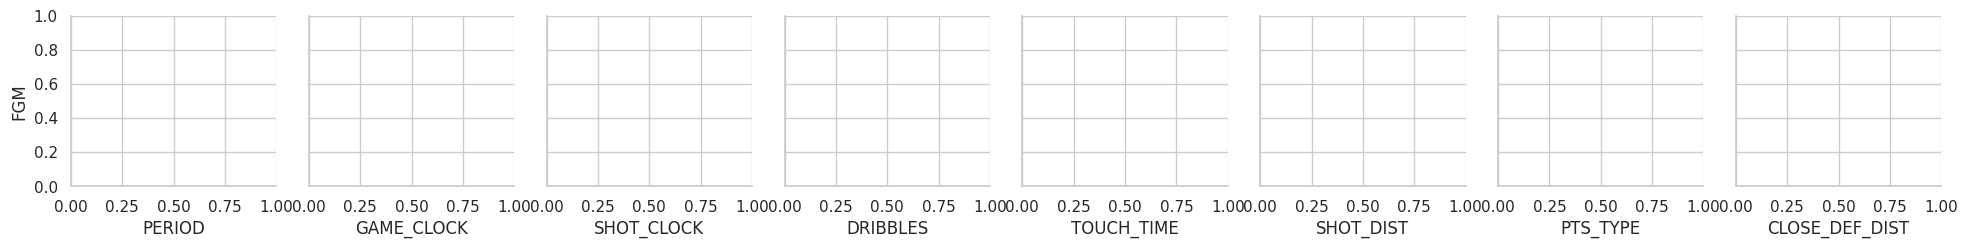

In [19]:
# Plot the pairwise distributions to see the correlation between selected attributes and FMG
# Question : should I compare the attribute of the "Original data" or the "Normalized data" ?
print('All attributes(Original):')
sns.set(style='whitegrid', context='notebook')
sns.pairplot(X_train+y_train, x_vars=X_train, y_vars=y_train, size=2.5)
plt.tight_layout()
plt.show

# print('All attributes(Normalized): ')
# sns.pairplot(X_train_std+y_train, x_vars=X_train, y_vars=y_train, size=2.5)